In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/content/Language recognition dataset.csv')

In [3]:
print(data.dtypes)

Text        object
language    object
dtype: object


In [4]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [5]:
print(data.isnull().sum())

Text        0
language    0
dtype: int64


In [6]:
data.count()

,0
Text,22000
language,22000


In [7]:
data["language"].value_counts()

,count
language,
Estonian,1000
Swedish,1000
Thai,1000
Tamil,1000
Dutch,1000
Japanese,1000
Turkish,1000
Latin,1000
Urdu,1000


In [8]:
data =data.drop_duplicates()

In [9]:
data = data.reset_index(drop=True)

In [10]:
data[data.language == 'Russian'].sample(2)

,Text,language
620,сын бедных галисийцев рано потерял отца мать б...,Russian
10968,статус автокефалии де-факто имеет с года когд...,Russian


In [11]:
data[data.language == 'Japanese'].sample(2)

,Text,language
16478,主にサイズからサイズ（女児用の一部はサイズ、男児用の一部はサイズ）までの小学校中学年頃から中...,Japanese
6433,銀行券は帝国国庫及びドイツ帝国銀行reichsbankから発行され、帝国のいくつかの構成国の...,Japanese


In [12]:
import re
import nltk

In [13]:

from nltk.stem.porter import PorterStemmer

In [14]:
Upper_Case_Lang = ['German', 'Arabic', 'Hindi', 'Urdu']

In [15]:
corpus = []

In [16]:
num = 0
for i in range(0,len(data)):
#  text = re.sub('[^a-zA-Z]',' ',data['Text'][i])
  text = re.sub(r'http[s]?://\S+', '', data['Text'][i])
  text = re.sub(r'\d+', '',data['Text'][i])
  text = text.split()
  text = ' '.join(text)
  num = num + 1
  print(num)
  lang = data['language'][i]
  if lang not in Upper_Case_Lang:
    text = text.lower()
  corpus.append(text)



Streaming output truncated to the last 5000 lines.
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
1

In [17]:
corpus

['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald',
 'sebes joseph pereira thomas på eng the jesuits and the sino-russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i -- rome libris',
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม',
 'விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களும் தமிழு

In [18]:
X = np.array(corpus)
Y = np.array(data["language"])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
#xv_train = vectorizer.fit_transform(X_train)
#xv_test = vectorizer.transform(X_test)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

# **Decision Tree Classifier**

In [22]:
from sklearn.tree import DecisionTreeClassifier
Treeclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Treeclassifier.fit(xv_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
Y_pred_tree = Treeclassifier.predict(xv_test)

In [24]:
Treeclassifier.score(xv_test, Y_test)

0.9072636540060992

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_tree))

              precision    recall  f1-score   support

      Arabic       0.99      0.96      0.98       330
     Chinese       0.45      0.93      0.61       301
       Dutch       0.95      0.97      0.96       323
     English       0.80      0.83      0.82       332
    Estonian       0.98      0.90      0.94       317
      French       0.92      0.95      0.94       320
       Hindi       0.96      0.94      0.95       316
  Indonesian       0.97      0.94      0.96       352
    Japanese       0.80      0.41      0.55       302
      Korean       0.98      0.90      0.94       355
       Latin       0.85      0.92      0.88       326
     Persian       0.99      0.97      0.98       330
   Portugese       0.92      0.92      0.92       331
      Pushto       0.97      0.94      0.95       305
    Romanian       0.98      0.94      0.96       356
     Russian       0.97      0.90      0.93       308
     Spanish       0.93      0.90      0.92       353
     Swedish       0.97    

# **Multinomial Naive Bayes Classifier**

In [26]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(xv_train,Y_train)

MultinomialNB()

In [27]:
Y_pred_MNB = MNB.predict(xv_test)

In [28]:
MNB.score(xv_test, Y_test)

0.955503188245079

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_MNB))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       330
     Chinese       0.71      0.83      0.77       301
       Dutch       1.00      0.98      0.99       323
     English       0.66      1.00      0.80       332
    Estonian       0.99      0.96      0.98       317
      French       0.96      1.00      0.98       320
       Hindi       1.00      0.97      0.98       316
  Indonesian       0.99      0.97      0.98       352
    Japanese       0.98      0.58      0.73       302
      Korean       1.00      0.99      0.99       355
       Latin       0.98      0.91      0.94       326
     Persian       1.00      1.00      1.00       330
   Portugese       1.00      0.96      0.98       331
      Pushto       1.00      0.96      0.98       305
    Romanian       0.99      0.99      0.99       356
     Russian       0.99      0.98      0.98       308
     Spanish       0.98      0.97      0.98       353
     Swedish       0.98    

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}


if 'Treeclassifier' in locals():
    y_pred_tree = Treeclassifier.predict(xv_test)
    results["Model"].append("Decision Tree")
    results["Accuracy"].append(accuracy_score(Y_test, y_pred_tree))
    results["Precision"].append(precision_score(Y_test, y_pred_tree, average='weighted'))
    results["Recall"].append(recall_score(Y_test, y_pred_tree, average='weighted'))
    results["F1 Score"].append(f1_score(Y_test, y_pred_tree, average='weighted'))


if 'MNB' in locals():
    y_pred_nb = MNB.predict(xv_test)
    results["Model"].append("Naive Bayes")
    results["Accuracy"].append(accuracy_score(Y_test, y_pred_nb))
    results["Precision"].append(precision_score(Y_test, y_pred_nb, average='weighted'))
    results["Recall"].append(recall_score(Y_test, y_pred_nb, average='weighted'))
    results["F1 Score"].append(f1_score(Y_test, y_pred_nb, average='weighted'))

pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.907264,0.928301,0.907264,0.911089
1,Naive Bayes,0.955503,0.965001,0.955503,0.956225


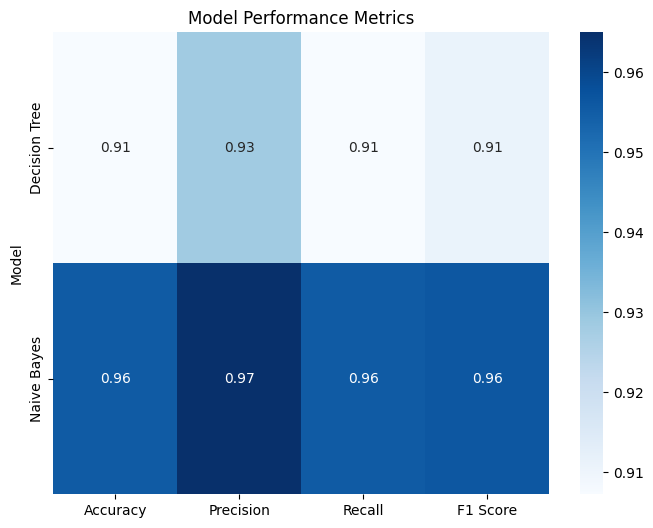

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 6))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap='Blues', fmt=".2f")
plt.title('Model Performance Metrics')
plt.show()

In [32]:
def predict(text):
    x = vectorization.transform([text]).toarray()
    lang = MNB.predict(x)
    print("This langauge is",lang[0])

In [33]:
text = "你好吗"
predict(text)

This langauge is Chinese


In [34]:
text = "नमस्ते, आप कैसे हैं"
predict(text)

This langauge is Hindi


In [35]:
text = "broo what"
predict(text)

This langauge is English


In [36]:
text = "comment allez-vous"
predict(text)

This langauge is French


In [37]:
text = "兄弟"
predict(text)

This langauge is Chinese
